In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


QUESTIONS:

1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

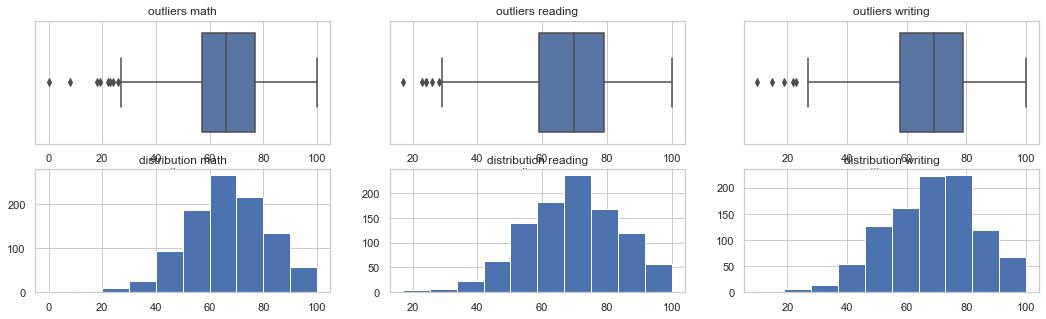

In [23]:
plt.figure(figsize=(18,5))

plt.subplot(2,3,1)
sns.boxplot(x=df["math score"])
plt.title('outliers math')

plt.subplot(2,3,2)
sns.boxplot(x=df["reading score"])
plt.title('outliers reading')

plt.subplot(2,3,3)
sns.boxplot(x=df["writing score"])
plt.title('outliers writing')

plt.subplot(2,3,4)
plt.hist(x=df["math score"])
plt.title('distribution math')

plt.subplot(2,3,5)
plt.hist(x=df["reading score"])
plt.title('distribution reading')

plt.subplot(2,3,6)
plt.hist(x=df["writing score"])
plt.title('distribution writing')

plt.show()

In [43]:
q75, q25 = np.percentile(df["math score"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,3.5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["math score"] > max_val) 
                      | (df["math score"] < min_val))[0]))
    ))
    
q75, q25 = np.percentile(df["reading score"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,3,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["reading score"] > max_val) 
                      | (df["reading score"] < min_val))[0]))
    ))
    
q75, q25 = np.percentile(df["writing score"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,3,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["writing score"] > max_val) 
                      | (df["writing score"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 42
The score threshold is: 1.5
Number of outliers is: 8
The score threshold is: 2.0
Number of outliers is: 2
The score threshold is: 2.5
Number of outliers is: 1
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 1.0
Number of outliers is: 37
The score threshold is: 1.5
Number of outliers is: 6
The score threshold is: 2.0
Number of outliers is: 1
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 1.0
Number of outliers is: 22
The score threshold is: 1.5
Number of outliers is: 5
The score threshold is: 2.0
Number of outliers is: 2
The score threshold is: 2.5
Number of outliers is: 0


In [57]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(np.sqrt(df["math score"]))
norm_stats = normaltest(np.sqrt(df["math score"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.sqrt(df["reading score"]))
norm_stats = normaltest(np.sqrt(df["reading score"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.sqrt(df["writing score"]))
norm_stats = normaltest(np.sqrt(df["writing score"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1233.4799726707836 and p value is 0.0
Normality test statistics is 259.4703560154713 and p value is 4.536574867826489e-57
Jarque-Bera test statistics is 88.0083349548674 and p value is 0.0
Normality test statistics is 70.4238348783534 and p value is 5.101038001506264e-16
Jarque-Bera test statistics is 141.6378240717818 and p value is 0.0
Normality test statistics is 97.39700939472482 and p value is 7.087745794883206e-22


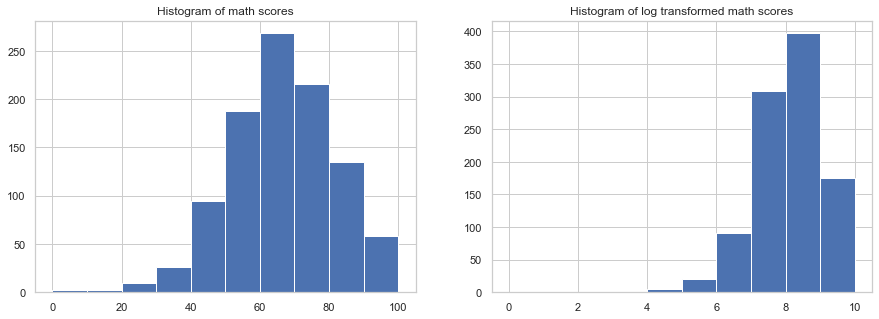

In [61]:
#log transform and square root transform fail for removing outliers from scores

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(df["math score"])
plt.title("Histogram of math scores")

plt.subplot(1,2,2)
plt.hist(df["math score"]**(1/2))
plt.title("Histogram of log transformed math scores")
plt.show()

In [65]:
df.drop(df.loc[df['math score']==0].index, inplace=True)
df.drop(df.loc[df['reading score']==0].index, inplace=True)
df.drop(df.loc[df['writing score']==0].index, inplace=True)

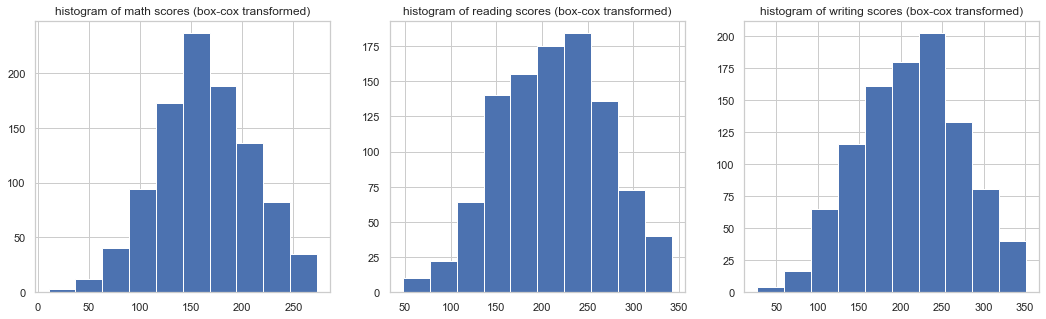

In [66]:
from scipy.stats import boxcox

math_boxcox,_ = boxcox(df["math score"])
reading_boxcox,_ = boxcox(df["reading score"])
writing_boxcox,_ = boxcox(df["writing score"])

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title("histogram of math scores (box-cox transformed)")

plt.subplot(1, 3, 2)
plt.hist(reading_boxcox)
plt.title("histogram of reading scores (box-cox transformed)")

plt.subplot(1, 3, 3)
plt.hist(writing_boxcox)
plt.title("histogram of writing scores (box-cox transformed)")

plt.show()

In [68]:
jb_stats = jarque_bera(np.sqrt(df["math score"]))
norm_stats = normaltest(np.sqrt(df["math score"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.sqrt(df["reading score"]))
norm_stats = normaltest(np.sqrt(df["reading score"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.sqrt(df["writing score"]))
norm_stats = normaltest(np.sqrt(df["writing score"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 137.78233427821982 and p value is 0.0
Normality test statistics is 91.8092718022297 and p value is 1.1584303691477202e-20
Jarque-Bera test statistics is 61.693652215114575 and p value is 4.007905118896815e-14
Normality test statistics is 53.70769628570281 and p value is 2.1753138937151093e-12
Jarque-Bera test statistics is 79.43007553986428 and p value is 0.0
Normality test statistics is 65.82554918491556 and p value is 5.083509159050983e-15


2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [69]:
df['ave_score'] = (df['math score']+df['reading score']+df['writing score'])/3

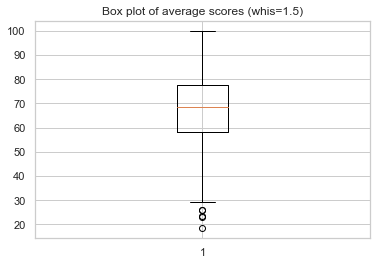

In [71]:
plt.boxplot(df["ave_score"])
plt.title("Box plot of average scores (whis=1.5)")
plt.show()

In [72]:
from scipy.stats import zscore

z_scores = zscore(df["ave_score"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  1,   2,   6,  16,  34,  38,  49,  56,  85,  93, 101, 103, 105,
       109, 113, 119, 120, 121, 124, 129, 145, 148, 154, 160, 163, 164,
       170, 171, 174, 178, 188, 213, 215, 228, 232, 233, 240, 262, 267,
       273, 275, 285, 298, 305, 315, 324, 332, 333, 346, 358, 360, 372,
       375, 376, 379, 380, 396, 402, 408, 419, 425, 438, 446, 450, 455,
       457, 462, 464, 467, 469, 473, 491, 492, 500, 502, 508, 513, 514,
       515, 520, 532, 538, 542, 545, 550, 562, 566, 571, 577, 580, 594,
       604, 606, 612, 614, 617, 618, 623, 625, 633, 634, 636, 640, 651,
       658, 666, 684, 688, 694, 695, 701, 707, 709, 710, 711, 712, 714,
       716, 721, 727, 731, 735, 741, 748, 752, 754, 778, 780, 783, 792,
       801, 802, 812, 814, 818, 819, 820, 830, 832, 844, 845, 851, 854,
       860, 863, 864, 872, 875, 885, 889, 890, 899, 902, 906, 915, 918,
       933, 937, 940, 955, 956, 961, 969, 978, 981, 982, 994, 998]),)
Number of 

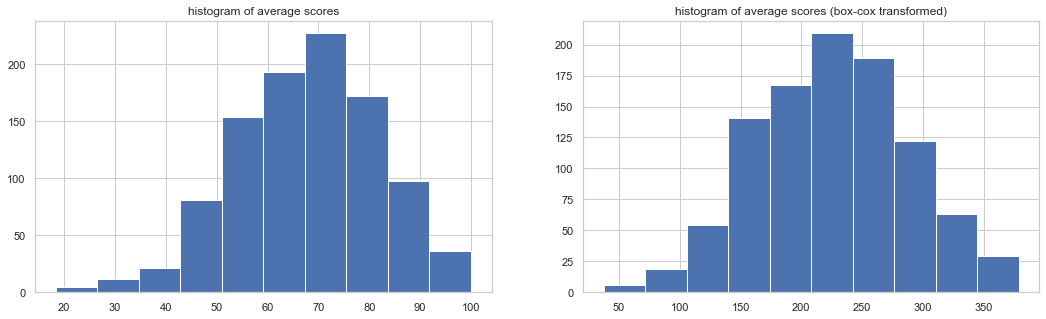

In [80]:
ave_score_boxcox,_ = boxcox(df["ave_score"])

plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.hist(df['ave_score'])
plt.title("histogram of average scores")

# histograms of the box-cox transformed data
plt.subplot(1, 2, 2)
plt.hist(ave_score_boxcox)
plt.title("histogram of average scores (box-cox transformed)")

plt.show()

In [81]:
jb_stats = jarque_bera(ave_score_boxcox)
norm_stats = normaltest(ave_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3.4323846909111793 and p value is 0.17974926966382276
Normality test statistics is 4.219879978703656 and p value is 0.12124524222064059


3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

Viables to keep for analysis include: gender, lunch, parental level of education, the new average score, and the test preparation course. Would race be useful here? Depends on what kinds of outcomes we are examining.